# Solution from Johannes Rieke and Alex Moore¶

In [5]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

### 1.

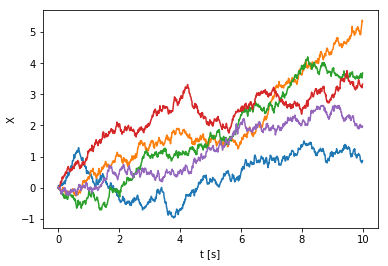

In [8]:
mu = 0.2
sigma = 0.5

dt = 0.01
time = np.arange(0, 10, dt)

for i in range(5):
    x = np.zeros_like(time)
    for i, t in enumerate(time[:-1]):
        x[i+1] = x[i] + mu * dt + sigma * np.sqrt(dt) * np.random.normal()
    plt.plot(time, x)

plt.xlabel('t [s]')
plt.ylabel('X')

### 2.

In [9]:
mus = [-0.1, 0, 0.1, 0.2, 0.5]
a = 1

percent_ups = []

for mu in mus:
    up_counter = 0
    for trial in range(200):
        decision_boundary_reached = False
        while not decision_boundary_reached:  # resimulate as long as decision boundary is found
            x = np.zeros_like(time)
            for i, t in enumerate(time[:-1]):
                x[i+1] = x[i] + mu * dt + sigma * np.sqrt(dt) * np.random.normal()
                if x[i+1] >= a:  # up
                    up_counter += 1
                    decision_boundary_reached = True
                    break
                elif x[i+1] <= -a:  # down
                    decision_boundary_reached = True
                    break
    percent_ups.append(up_counter / 200 * 100)

(0, 100)

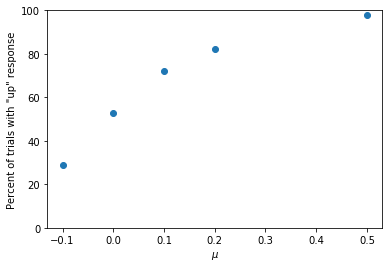

In [10]:
plt.plot(mus, percent_ups, 'o')
plt.xlabel(r'$\mu$')
plt.ylabel('Percent of trials with "up" response')
plt.ylim(0, 100)

For a = 0.5, the curve is flatter; for a = 2, the curve is steeper.

### 3.

Picking $\mu$ = 0.1

In [11]:
mu = 0.1

reaction_times_up = []
reaction_times_down = []

for trial in range(2000):
    x = np.zeros_like(time)
    for i, t in enumerate(time[:-1]):
        x[i+1] = x[i] + mu * dt + sigma * np.sqrt(dt) * np.random.normal()
        if x[i+1] >= a:  # up
            reaction_times_up.append(t)
            break
        elif x[i+1] <= -a:  # down
            reaction_times_down.append(t)
            break

### 4.

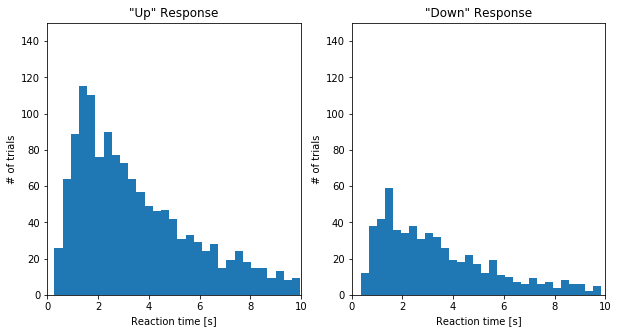

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, reaction_times, title in zip(axes, [reaction_times_up, reaction_times_down], ['"Up" Response', '"Down" Response']):
    plt.sca(ax)
    plt.hist(reaction_times, 30)
    plt.xlabel('Reaction time [s]')
    plt.ylabel('# of trials')
    plt.title(title)
    plt.xlim(0, 10)
    plt.ylim(0, 150)

In [13]:
np.mean(reaction_times_up), np.mean(reaction_times_down)

(3.4887300380228132, 3.3844965277777783)

Both distributions seem to follow a Poisson distribution. Less trials show a down response, which is obvious due to the choice of $\mu$ above. However, except for the overall count, both distribution are very similar. This is also refelected in the similar mean values. From an experimental point of view, this does not make sense: If "Up" appears more often, subjects should also be able to guess it more quickly (i.e. the mean reaction time for "Up" should be smaller).

### 5.

In [14]:
m_mu = 1
s_mu = 1

mu = np.random.normal(m_mu, s_mu)

In [17]:
m_mus = np.linspace(-10, 10, 10)
s_mus = np.linspace(0.1, 10, 10)
a = 1

percent_up_grid = np.zeros((m_mus.size, s_mus.size))

for i_m, m_mu in enumerate(m_mus):
    for i_s, s_mu in enumerate(s_mus):
        up_counter = 0
        for trial in range(200):
            mu = np.random.normal(m_mu, s_mu)
            decision_boundary_reached = False
            while not decision_boundary_reached:  # resimulate as long as decision boundary is found
                x = np.zeros_like(time)
                for i, t in enumerate(time[:-1]):
                    x[i+1] = x[i] + mu * dt + sigma * np.sqrt(dt) * np.random.normal()
                    if x[i+1] >= a:  # up
                        up_counter += 1
                        decision_boundary_reached = True
                        break
                    elif x[i+1] <= -a:  # down
                        decision_boundary_reached = True
                        break
        percent_up_grid[i_m, i_s] = up_counter / 200 * 100

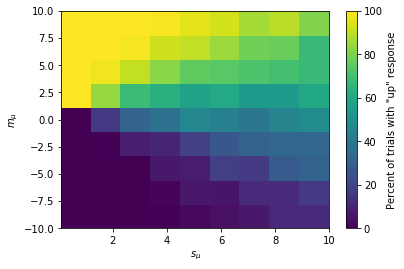

In [18]:
plt.pcolor(s_mus, m_mus, percent_up_grid)
plt.xlabel('$s_{\mu}$')
plt.ylabel('$m_{\mu}$')
plt.colorbar(label='Percent of trials with "up" response')

Picking $m_{\mu}$ = 4 and $s_{\mu}$ = 7

In [19]:
m_mu = 4
s_mu = 7

reaction_times_up = []
reaction_times_down = []

for trial in range(2000):
    mu = np.random.normal(m_mu, s_mu)
    x = np.zeros_like(time)
    for i, t in enumerate(time[:-1]):
        x[i+1] = x[i] + mu * dt + sigma * np.sqrt(dt) * np.random.normal()
        if x[i+1] >= a:  # up
            reaction_times_up.append(t)
            break
        elif x[i+1] <= -a:  # down
            reaction_times_down.append(t)
            break

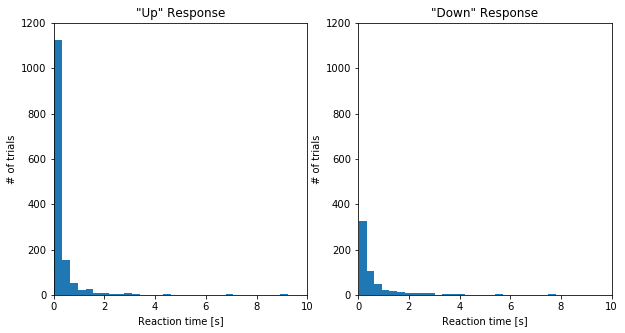

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, reaction_times, title in zip(axes, [reaction_times_up, reaction_times_down], ['"Up" Response', '"Down" Response']):
    plt.sca(ax)
    plt.hist(reaction_times, 30)
    plt.xlabel('Reaction time [s]')
    plt.ylabel('# of trials')
    plt.title(title)
    plt.xlim(0, 10)
    plt.ylim(0, 1200)

In [22]:
np.mean(reaction_times_up), np.mean(reaction_times_down)

(0.33421237693389594, 0.64525129982668983)

Here, the distributions make more sense from an experimental point of view: The mean reaction time for "Up" is way smaller than for "Down".